In [1]:
import os
import cv2
from utils import mining_data_tb as md_tb
from utils import folders_tb as f_tb
from utils import visualization_tb as v_tb
from utils import models as mo_tb
import pandas as pd
import numpy as np
from PIL import Image
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator

## Definiendo la semilla con la que se trabajará a lo largo de todo el documento

In [2]:
seed = 42

In [3]:
train_dir = '../data/fotos_perros/train'
test_dir = '../data/fotos_perros/test'

In [4]:
raza_list = os.listdir(train_dir)
print("num. breeds total:", len(raza_list))

num. breeds total: 120


In [5]:
raza_list[:5]

['Affenpinscher',
 'Afghan Hound',
 'African Hunting Dog',
 'Airedale',
 'American Staffordshire Terrier']

In [6]:
def cargar_imagenes_and_labels(razas, path_set):
    lista_imagenes = []
    lista_labels = []
    for i, raza in enumerate(razas):
        for image_name in os.listdir(path_set + os.sep + raza):
            imagen = cv2.imread(path_set + os.sep + raza + os.sep + image_name)
            imagen_foto = Image.fromarray(imagen)
            resized_imagen_foto = imagen_foto.resize((64, 64))
            lista_imagenes.append(np.array(resized_imagen_foto))
            lista_labels.append(i)

    return lista_imagenes, lista_labels

In [7]:
razas = raza_list[:5]

train_imagenes, train_labels = cargar_imagenes_and_labels(razas, train_dir)

In [8]:
test_imagenes, test_labels = cargar_imagenes_and_labels(razas, test_dir)

In [9]:
print('Imágenes train: ', len(train_imagenes))
print('Labels train: ', len(train_labels))
print('Tipo train_imagenes: ', type(train_imagenes), ' -  Tipo train_labels: ', type(train_labels))
print('\nImágenes test: ', len(test_imagenes))
print('Labels test: ', len(test_labels))
print('Tipo test_imagenes: ', type(test_imagenes), ' -  Tipo test_labels: ', type(test_labels))

Imágenes train:  12000
Labels train:  12000
Tipo train_imagenes:  <class 'list'>  -  Tipo train_labels:  <class 'list'>

Imágenes test:  8580
Labels test:  8580
Tipo test_imagenes:  <class 'list'>  -  Tipo test_labels:  <class 'list'>


In [10]:
train_imagenes = np.array(train_imagenes)
print('Shape train_imagenes: ', train_imagenes.shape)
train_labels = np.array(train_labels)
print('Shape train_labels: ', train_labels.shape)
test_imagenes = np.array(test_imagenes)
print('Shape test_imagenes: ', test_imagenes.shape)
test_labels = np.array(test_labels)
print('Shape test_labels: ', test_labels.shape)

Shape train_imagenes:  (12000, 64, 64, 3)
Shape train_labels:  (12000,)
Shape test_imagenes:  (8580, 64, 64, 3)
Shape test_labels:  (8580,)


In [11]:
n = np.arange(train_imagenes.shape[0])
print('Orden antes de mezclar:', n[:5])
np.random.seed(42)
np.random.shuffle(n)
print('Orden después de mezclar:', n[:5])

Orden antes de mezclar: [0 1 2 3 4]
Orden después de mezclar: [1935 6494 1720 9120  360]


In [12]:
train_imagenes = train_imagenes[n]
train_labels = train_labels[n]

# Preprocesamiento

## Normalizando

In [13]:
print('train_imagenes.max(): ', train_imagenes.max())
print('test_imagenes.max(): ', test_imagenes.max())
print('train_imagenes.min(): ', train_imagenes.min())
print('test_imagenes.min(): ', test_imagenes.min())

train_imagenes.max():  255
test_imagenes.max():  255
train_imagenes.min():  0
test_imagenes.min():  0


In [14]:
train_imagenes = train_imagenes/255
test_imagenes = test_imagenes/255

In [15]:
print('train_imagenes.max(): ', train_imagenes.max())
print('test_imagenes.max(): ', test_imagenes.max())
print('train_imagenes.min(): ', train_imagenes.min())
print('test_imagenes.min(): ', test_imagenes.min())

train_imagenes.max():  1.0
test_imagenes.max():  1.0
train_imagenes.min():  0.0
test_imagenes.min():  0.0


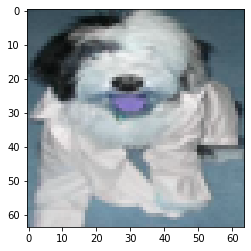

In [16]:
plt.imshow(train_imagenes[42]);

In [17]:
train_labels[:10]

array([19, 64, 17, 91,  3, 96, 52, 85, 22, 46])

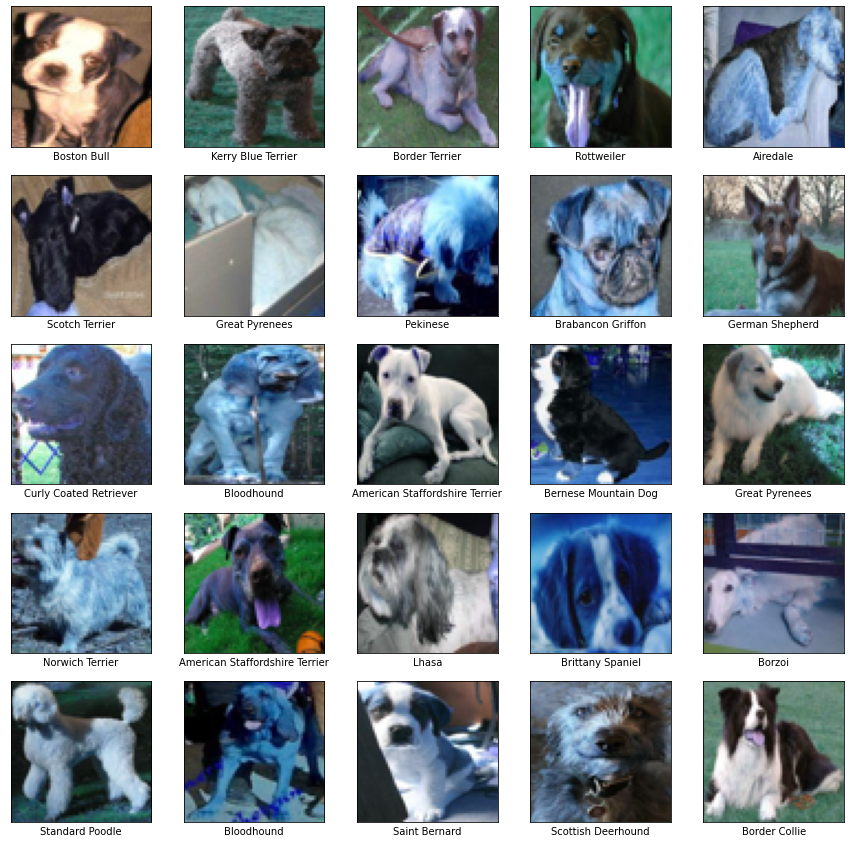

In [18]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_imagenes[i])
    plt.xlabel(raza_list[train_labels[i]])
plt.show();

## A escala de grises

In [19]:
train_imagenes_gray = rgb2gray(train_imagenes)
test_imagenes_gray = rgb2gray(test_imagenes)

In [20]:
print('Shape train_imagenes_gray: ', train_imagenes_gray.shape)
print('Shape test_imagenes_gray: ', test_imagenes_gray.shape)

Shape train_imagenes_gray:  (12000, 64, 64)
Shape test_imagenes_gray:  (8580, 64, 64)


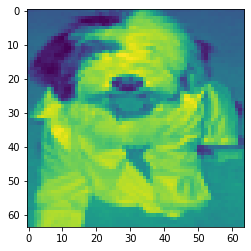

In [21]:
plt.imshow(train_imagenes_gray[42]);

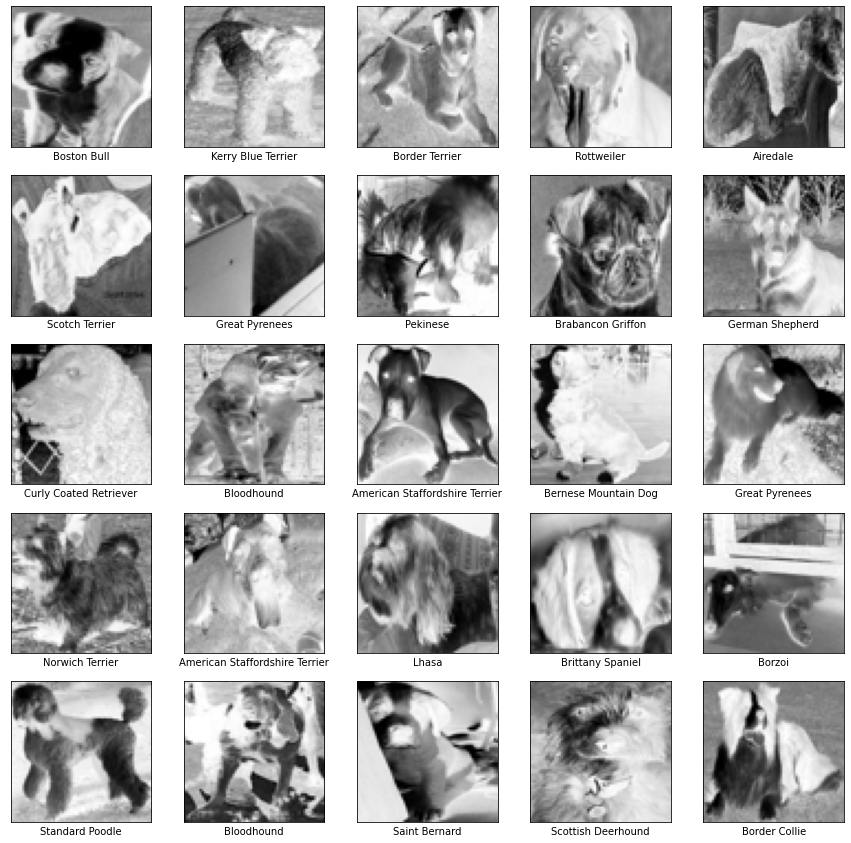

In [22]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_imagenes_gray[i], cmap=plt.cm.binary)
    plt.xlabel(raza_list[train_labels[i]])
plt.show();

## Dividiendo conjunto TRAIN en TRAIN/VALIDACIÓN

In [23]:
x_train, x_val , y_train, y_val = train_test_split(train_imagenes, train_labels, test_size=0.2, random_state= seed)

In [24]:
print('x_train.shape:', x_train.shape)
print('x_val.shape:', x_val.shape)
print('y_train.shape:', y_train.shape)
print('y_val.shape:', y_val.shape)

x_train.shape: (9600, 64, 64, 3)
x_val.shape: (2400, 64, 64, 3)
y_train.shape: (9600,)
y_val.shape: (2400,)


## Dividiendo conjunto TRAIN en TRAIN/VALIDACIÓN para imágenes en escala de gris

In [25]:
x_train_gray, x_val_gray , y_train_gray, y_val_gray = train_test_split(train_imagenes_gray, train_labels, test_size=0.2, random_state= seed)

In [26]:
print('x_train_gray.shape:', x_train_gray.shape)
print('x_val_gray.shape:', x_val_gray.shape)
print('y_train_gray.shape:', y_train_gray.shape)
print('y_val_gray.shape:', y_val_gray.shape)
print('x_val_gray.max():', x_val_gray.max())
print('x_val_gray.min():', x_val_gray.min())

x_train_gray.shape: (9600, 64, 64)
x_val_gray.shape: (2400, 64, 64)
y_train_gray.shape: (9600,)
y_val_gray.shape: (2400,)
x_val_gray.max(): 1.0
x_val_gray.min(): 0.0


## Primer modelo - Model1

In [27]:
model1 = models.Sequential()

model1.add(layers.Conv2D(filters=8,
                         kernel_size=(3,3),
                         input_shape=(64,64,3)))
model1.add(layers.MaxPooling2D(pool_size = (2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(32))
model1.add(layers.Dense(5, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7688)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                246048    
_________________________________________________________________
dense_1 (Dense)              (None, 120)               3960      
Total params: 250,232
Trainable params: 250,232
Non-trainable params: 0
_________________________________________________________________


In [28]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history1 = model1.fit(x = x_train, y=y_train, validation_data=(x_val,y_val), epochs=10, verbose=1)

Epoch 1/10
300/300 [==============================] - 9s 26ms/step - loss: 4.6282 - accuracy: 0.0298 - val_loss: 4.3892 - val_accuracy: 0.0404
Epoch 2/10
300/300 [==============================] - 7s 25ms/step - loss: 4.0662 - accuracy: 0.0930 - val_loss: 4.2671 - val_accuracy: 0.0600
Epoch 3/10
300/300 [==============================] - 7s 25ms/step - loss: 3.6789 - accuracy: 0.1622 - val_loss: 4.2604 - val_accuracy: 0.0621
Epoch 4/10
300/300 [==============================] - 8s 25ms/step - loss: 3.3078 - accuracy: 0.2341 - val_loss: 4.4870 - val_accuracy: 0.0600
Epoch 5/10
300/300 [==============================] - 7s 25ms/step - loss: 2.9504 - accuracy: 0.3049 - val_loss: 4.6364 - val_accuracy: 0.0567
Epoch 6/10
300/300 [==============================] - 7s 25ms/step - loss: 2.6243 - accuracy: 0.3677 - val_loss: 4.8494 - val_accuracy: 0.0617
Epoch 7/10
300/300 [==============================] - 7s 25ms/step - loss: 2.3115 - accuracy: 0.4430 - val_loss: 5.1833 - val_accuracy: 0.0617

In [30]:
history1.history

{'loss': [4.628174781799316,
  4.066226005554199,
  3.6788766384124756,
  3.3078413009643555,
  2.9503984451293945,
  2.6243228912353516,
  2.3114819526672363,
  2.0172977447509766,
  1.7413500547409058,
  1.5008774995803833],
 'accuracy': [0.029791666194796562,
  0.09302083402872086,
  0.16218750178813934,
  0.23406249284744263,
  0.3048958480358124,
  0.36770832538604736,
  0.4430208206176758,
  0.5085416436195374,
  0.5755208134651184,
  0.6384375095367432],
 'val_loss': [4.389153957366943,
  4.267127513885498,
  4.260383129119873,
  4.487032413482666,
  4.636352062225342,
  4.8494133949279785,
  5.183270454406738,
  5.463383674621582,
  5.8699564933776855,
  6.283745288848877],
 'val_accuracy': [0.0404166653752327,
  0.05999999865889549,
  0.06208333373069763,
  0.05999999865889549,
  0.05666666850447655,
  0.061666667461395264,
  0.061666667461395264,
  0.05999999865889549,
  0.05624999850988388,
  0.05458333343267441]}

In [93]:
mo_tb.guardar_modelo(model1, 'model1')

In [31]:
prediccion_model1 = model1.predict(test_imagenes)

In [32]:
test_imagenes.shape

(8580, 64, 64, 3)

In [33]:
lista_predicciones = []
for numero_prediccion in range(0, prediccion_model1.shape[0]):
    prediccion_raza = prediccion_model1[numero_prediccion].argmax()
    lista_predicciones.append(prediccion_raza)

In [34]:
recall_model1 = recall_score(test_labels, lista_predicciones, average="macro")
recall_model1

0.05990731316061379

In [35]:
precision_model1 = precision_score(test_labels, lista_predicciones, average="macro")
precision_model1

0.062135810702858695

In [97]:
df_model_comparasion = pd.DataFrame(data=[], columns=['Modelo', 'Parámetros', 'Recall', 'Score'])
df_model_comparasion

,Modelo,Parámetros,Recall,Score


In [ ]:
df_model1 = pd.DataFrame(data=['Model1',], columns=['Modelo', 'Parámetros', 'Recall', 'Score'])

In [98]:
model1.history.history

{}

## Data Augmentation

In [50]:
datagen = ImageDataGenerator(
                             shear_range=0.3,
                             zoom_range=0.3,
                             horizontal_flip=True) 

In [54]:
x_train.shape

(400, 64, 64, 3)

In [55]:
data_augmentation.fit(x_train)

In [70]:
j = Image.fromarray(x_val[0])

TypeError: Cannot handle this data type: (1, 1, 3), <f8

In [61]:
a = cv2.imread(train_dir + os.sep + "Chihuahua" + os.sep + "n02085620_7.jpg")

In [62]:
a.shape

(224, 224, 3)

In [64]:
a2 = Image.fromarray(a)

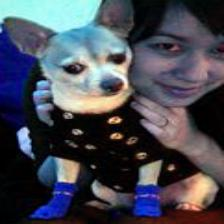

In [65]:
a2

In [ ]:
a2.re

In [18]:
razas = raza_list[:3]
for i, raza in enumerate(razas):
    print(i)
    print(raza)
    print('============')

0
Affenpinscher
1
Afghan Hound
2
African Hunting Dog
